[[ 0.03807591  0.05068012  0.06169621 ... -0.00259226  0.01990842
  -0.01764613]
 [-0.00188202 -0.04464164 -0.05147406 ... -0.03949338 -0.06832974
  -0.09220405]
 [ 0.08529891  0.05068012  0.04445121 ... -0.00259226  0.00286377
  -0.02593034]
 ...
 [ 0.04170844  0.05068012 -0.01590626 ... -0.01107952 -0.04687948
   0.01549073]
 [-0.04547248 -0.04464164  0.03906215 ...  0.02655962  0.04452837
  -0.02593034]
 [-0.04547248 -0.04464164 -0.0730303  ... -0.03949338 -0.00421986
   0.00306441]]
440
0.09094495587989077
mean = 0.00020669308154520628
sd = 0.04762815608867796
mean2 = 1.5612511283791264e-18
sd2 = 1.0000000000000002
mean3 = -7.796793513844849e-17
440
0.08928327301403582
mean = 0.00020291652957735414
sd = 0.0476317530508499
mean2 = -3.532527805625498e-18
sd2 = 1.0000000000000022
mean3 = -6.762267513625954e-17
440
0.033968149748878906
mean = 7.720034033836115e-05
sd = 0.04756336382123646
mean2 = 1.2773872868556488e-18
sd2 = 0.9999999999999994
mean3 = 4.945538927875697e-17
440
0.080198

  -0.28986657 -0.82903379 -1.55197087 -1.23910722]]
(10, 10)
44 10 10
[[ 0.78420586  0.77384951  0.96855466  1.44512743 -0.27622822 -0.36309298
  -1.02874963  0.765492    1.00022729  0.53442841]
 [ 1.15102208 -0.94148441 -0.28317106 -1.24086345 -0.10537251 -0.46531176
   1.74765944 -1.07414697 -1.07856081 -0.39988173]
 [-0.93365623  0.39266419  1.52211957  0.62485477  2.40234848  2.32679254
  -0.57720998  2.01427919  1.39081121  1.04705875]
 [-1.55397515  1.05973849 -0.45841266 -0.6152045  -0.85575979 -0.7305179
   0.35273779 -0.82903379 -1.07908279 -0.57930235]
 [ 0.23071287  1.05973849 -0.83004572  0.54765263 -0.59534261 -0.56903099
   0.46245072 -0.72066796 -0.78705253 -0.56193907]
 [-1.17517384 -0.94148441 -0.90633624 -1.1725074  -0.61656179 -0.59113151
   0.33706451 -0.5710199  -0.48987846 -1.29698483]
 [ 1.02390755 -0.94148441 -0.87989893  2.1930231   0.75303968 -0.53752135
   3.78518545 -1.60307543 -0.26880149  0.32358851]
 [ 0.67307144 -0.94148441  0.37096353  0.08926497  1.447

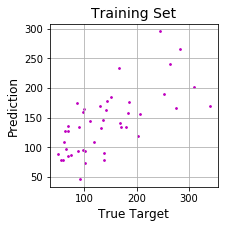

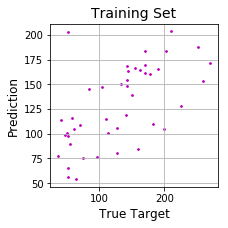

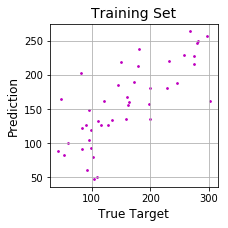

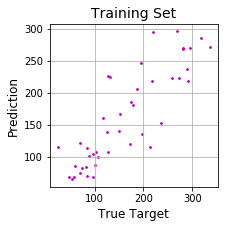

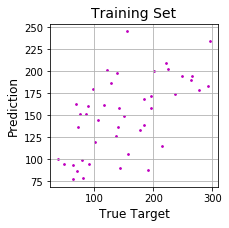

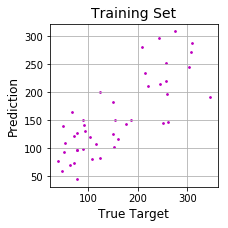

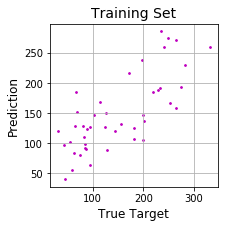

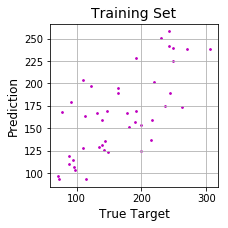

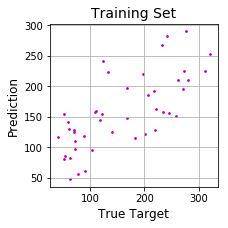

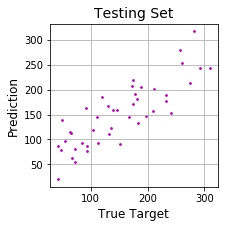

In [4]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
import math
import statistics
import scipy
from scipy import stats
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
from scipy import ndimage
diabetes = datasets.load_diabetes()
X = diabetes.data
y = diabetes.target

print(X)
n=440
n2=10
for j in range(n2):
    mean=0
    mean2=0
    mean3=0
    sum1=0.0
    sums1=0
    sum2=0
    sums2=0
    sum3=0
    sd1=0
    sd2=0
    for i in range(n):
        sum1=sum1+X[i,j]
    print(n)
    mean=sum1/n
    print(sum1)
    print(f'mean = {mean}')
    
    for i in range(n):
        sums1=sums1+((X[i,j]-mean)**2)
    sd1=math.sqrt(sums1/(n-1))
    print(f'sd = {sd1}')
    
    for i in range(n):
        X[i,j]=(X[i,j]-mean)
        sum2=sum2+X[i,j]
    mean2=sum2/n
    print(f'mean2 = {mean2}')
    
    for i in range(n):
        X[i,j]=(X[i,j])/sd1
        sum3=sum3+X[i,j]
        sums2=sums2+((X[i,j]-mean2)**2)
    mean3=sum3/n
    sd2=math.sqrt(sums2/(n-1))
    print(f'sd2 = {sd2}')
    print(f'mean3 = {mean3}')
    
def gaussian(x, u, sigma):
    return (np.exp(-0.5 * np.linalg.norm(x-u) / sigma))

NX=np.zeros((44,10,10))
for j in range(10):
    a=0
    b=0
    for i in range(440):
        NX[a,j,b]=X[i,j]
        a=a+1
        if a%44==0:
            b=b+1
            a=0
            
Ny=np.zeros((44,10))
a=0
b=0
for i in range(440):
    Ny[a,b]=y[i]
    a=a+1
    if a%44==0:
        b=b+1
        a=0
        
NNy=np.zeros((440))        
Ay=np.zeros((440))

for k in range(10):
    N, p, z = NX.shape
    print(N, p, z)
    # Space for design matrix
    #
    M = 10
    U = np.zeros((N,M))
    # Basis function locations at random
    #
    kmeans = KMeans(n_clusters=M)
    kmeans.fit(NX[:,:,k])
    labels =kmeans.predict(NX[:,:,k])

    C = kmeans.cluster_centers_
    print(C)
    print(C.shape)
    # Basis function range as distance between two random data
    #
    sigma= np.mean(scipy.spatial.distance.pdist(NX[:,:,k]))

    # Construct the design matrix
    #
    for i in range(N):
        for j in range(M):
            U[i,j] = gaussian(NX[i,:,k], C[j,:], sigma)
    # Pseudo inverse solution for linear part
    #
    l = np.linalg.inv(U.T @ U) @ U.T @ Ny[:,k]
    # Predicted values on training data
    #
    yh = U @ l
    fig, ax = plt.subplots(figsize=(3,3))
    ax.scatter(Ny[:,k], yh, c='m', s=3)
    ax.grid(True)
    if k==9:
        ax.set_title("Testing Set", fontsize=14)
    else:
        ax.set_title("Training Set", fontsize=14)
    ax.set_xlabel("True Target", fontsize=12)
    ax.set_ylabel("Prediction", fontsize=12)
     